<a href="https://colab.research.google.com/github/Mr-Dheer/University/blob/main/Copy_of_4_2_The_Iris_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Iris Problem**

*	Botanists require you to help them design an algorithm to identify flower types from 4 key measurements.In order to do this they need to identiy appropriate variables. 
*	The data is stored in iris.csv [here](https://drive.google.com/open?id=1_7ttss_S-I4mmLqWoMjOvwddWfAvAx5Q).
*	Give some univariate statistics to describe the data.
*	What should you do with the missing data?
* Which variables should you include in your analysis. Justify this.
*	Can you come up with a rules based algorithm to help the botanist?

The image below shows where the various varibles from the flower are measured and all measurements are in centimetres

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Flower.gif" width="370" height="220" align="center" hspace="80"/>

This project does not count for any marks towards your final mark. 

You will need to do a little research on python utilities to make this work. Pandas groupby function will be useful.

**What are we looking for?**

A google colab notebook with the following:
* The problem you are trying to solve
* An analysis of the data using one of the methods you were given from lecture 1. **You do not need to implement any other method and you will not receive extra marks for doing so.** In your analysis state clearly the assumptions you made and why you settled on your final model.
* Implement a train/test procedure. 
* Finally, submit your work in a PPT presentation on loop. 

## Importing all the Libararies and Data

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [158]:
original=pd.read_csv('./iris_data.csv')
df=original.copy()


In [159]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [161]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

## Since there are only 2 values missing we can drop them

In [162]:
df.dropna(inplace=True)

In [163]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [164]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [165]:
df_setosa = df.loc[df['Species']=='setosa']
df_virginica = df.loc[df['Species'] == 'virginica']
df_versicolor = df.loc[df['Species'] == 'versicolor']

In [166]:
df.Species.value_counts()

versicolor    50
virginica     50
setosa        49
Name: Species, dtype: int64

## Visualising  the Data

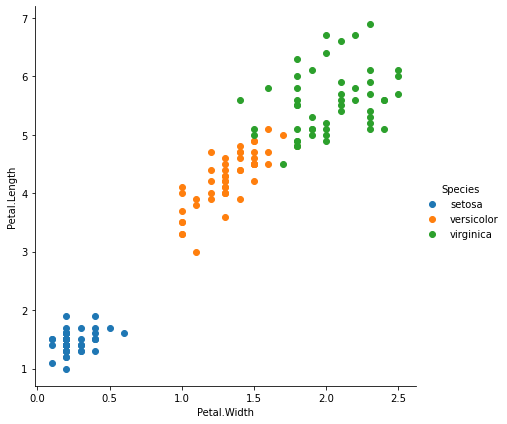

In [167]:
sns.FacetGrid(data=df,hue='Species', size=6).map(plt.scatter,  'Petal.Width','Petal.Length').add_legend()
plt.show()

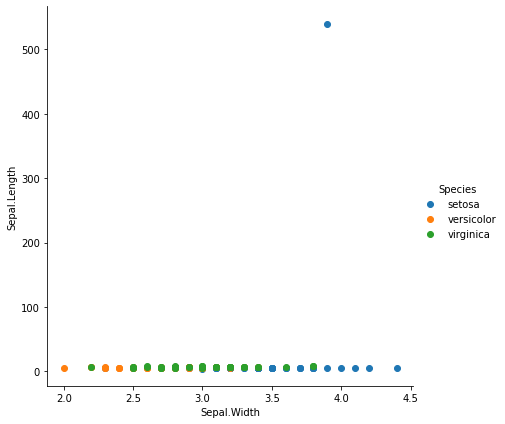

In [168]:
sns.FacetGrid(data=df,hue='Species', size=6).map(plt.scatter, 'Sepal.Width','Sepal.Length' ).add_legend()
plt.show()

## There seems to be few Outliers in Setosa Species for Sepal Length, will check for other Outliers as well, just to be sure.

In [169]:



def detect_outliers_iqr(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


print(" Sepal Width"),
print(detect_outliers_iqr(df['Sepal.Width'])),

print('')
print('Sepal Length')
print(detect_outliers_iqr(df['Sepal.Length'])),

print('')
print(" Petal Width")
print(detect_outliers_iqr(df['Petal.Width'])),

print('')
print('Petal Length')
print(detect_outliers_iqr(df['Petal.Length'])),


 Sepal Width
15    4.4
32    4.1
33    4.2
60    2.0
Name: Sepal.Width, dtype: float64

Sepal Length
5    540.0
Name: Sepal.Length, dtype: float64

 Petal Width
Series([], Name: Petal.Width, dtype: float64)

Petal Length
Series([], Name: Petal.Length, dtype: float64)


(None,)

## *  4 Outlier in Sepal Width
## * 1 Outlier in Sepal Length
## * No Outliers in Petal Length & Width

## Since the Data is small and there is few outliers, dropping the outlier can impact the validity of the analysis.
## Hence, I will be imputing those values with the median.

In [170]:
def impute_median_iqr(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    data[outliers] = np.median(data)
    # mode = data[~outliers].mode().values[0]
    # data[outliers] = mode
    return data

impute_median_iqr(df['Sepal.Width'])
impute_median_iqr(df['Sepal.Length'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 149, dtype: float64

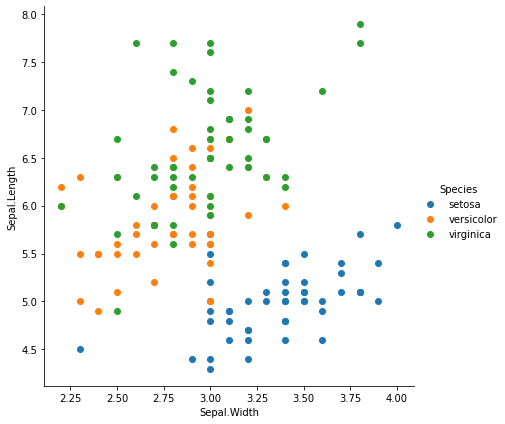

In [171]:
sns.FacetGrid(data=df,hue='Species', size=6).map(plt.scatter, 'Sepal.Width','Sepal.Length' ).add_legend()
plt.show()

## Creating a Rule Based Algorithm

In [178]:
def iris_classifier(sepal_length, sepal_width, petal_length, petal_width):
    if sepal_length <= 6.0:
        if sepal_width >= 3.25:
            if petal_length <= 2:
                if petal_width <= 0.5:
                    return 'setosa'
    elif petal_length >= 5:
        if petal_width >= 1.8:
            return 'virginica'
    else:
        if petal_length <= 4.8:
            if petal_width <= 1.7:
                return 'versicolor'
    return 'Not Classified'



iris_classifier()

'setosa'

## Splitting the Data

In [179]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)


(104, 5)
(45, 5)


In [181]:
train_X = train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]# taking the training data features

train_y=train.Species# output of our training data

test_X= test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']] # taking test data features

test_y =test.Species   #output value of test data

In [182]:
train_X.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
42,4.4,3.2,1.3,0.2
80,5.5,2.4,3.8,1.1


## Training the Data on Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression = LogisticRegression(solver='lbfgs')

# Fit the model to the training data
logistic_regression.fit(train_X, train_y)

LogisticRegression()

In [192]:
y_pred = logistic_regression.predict(test_X)

In [195]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(logistic_regression, train_X, train_y, cv=10)
print(cv_scores)
print()
print('Accuracy =',cv_scores.mean())

[1.         0.90909091 0.90909091 1.         1.         0.9
 1.         1.         1.         0.8       ]

Accuracy = 0.9518181818181819


## The model is giving good accuraccy on an average 95%